##### The main task is to conduct an anlysis on the product sales of a company and obtain information about its various retailer types, expressed in offset from UTC. The target is to display the average amount of sales that occured in each time zone. 

##### The process follows-
##### Ask
##### Prepare
##### Process
##### Analyze
##### Share

In [ ]:
%pwd

In [ ]:
%cd C:/Sales-products-timezone.csv

In [ ]:
%pwd

In [1]:
import pandas as pd
import pytz
import datetime as datetime
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('Sales-products-timezone.csv', index_col ='SaleID')
sales_data=data.copy()
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.00,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.00,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.00,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.00,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,06/12/2020,11:15:47,CET
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,07/06/2020,01:54:41,CET
SaleID_7,United Kingdom,Outdoors Shop,Husky Rope 50,270.00,27/12/2020,02:07:28,GMT
SaleID_8,United Kingdom,Outdoors Shop,Granite Signal Mirror,499.99,15/09/2020,11:44:57,GMT
SaleID_9,United Kingdom,Outdoors Shop,Granite Carabiner,32.00,23/09/2020,01:40:29,GMT


In [3]:
sales_data[['DateOfSale','TimeOfSale','TimeZone']].head()

,DateOfSale,TimeOfSale,TimeZone
SaleID,,,
SaleID_1,06/01/2020,23:20:56,EST
SaleID_2,05/02/2020,17:27:08,EST
SaleID_3,30/10/2020,09:04:43,EST
SaleID_4,13/11/2020,04:25:06,EST
SaleID_5,06/12/2020,11:15:47,CET


##### For the prepare phase, checking if there's the required data and if the data will be suitable to answer the questions. 
##### There's information about product sold, Revenue, retailer type, time zone which is necessary to answer the target question. The collected data is suitable for moving forward in the analysis process.  

In [4]:
e=[]
for i in sales_data.columns:
    print(i, sales_data[i].nunique())
    e.append(sales_data[i].nunique())
e

RetailerCountry 11
RetailerType 7
Product 71
Sales Revenue ($) 66
DateOfSale 94
TimeOfSale 100
TimeZone 6


[11, 7, 71, 66, 94, 100, 6]

##### Process
##### cleaning the data

In [6]:
sales_data['date_time'] = pd.to_datetime(sales_data['DateOfSale'] + " " + sales_data['TimeOfSale'])
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone,date_time
SaleID,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET,2020-06-12 11:15:47


In [7]:
sales_data=sales_data.drop(['DateOfSale','TimeOfSale'], axis=1)
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47


##### Checking if the timezones in the data matches with the all_timezones in pytz

In [8]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'SGT', 'Australia/West'], dtype=object)

In [9]:
for i in sales_data['TimeZone'].unique():
    if i in (pytz.all_timezones):
        print(True)
    else:
        print(False)

True
True
True
True
False
True


###### Replacing "SGT" with "Singapore" as it is i  the all_timezones of pytz

In [10]:
sales_data.loc[:,'TimeZone'] = sales_data.loc[:,'TimeZone'].replace({'SGT':'Singapore'})

In [11]:
sales_data['TimeZone'].unique()

array(['EST', 'CET', 'GMT', 'EET', 'Singapore', 'Australia/West'],
      dtype=object)

In [12]:
for i in sales_data['TimeZone'].unique():
    if i in (pytz.all_timezones):
        print(True)
    else:
        print(False)

True
True
True
True
True
True


In [13]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.00,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.00,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.00,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.00,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,CET,2020-06-12 11:15:47
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,CET,2020-07-06 01:54:41
SaleID_7,United Kingdom,Outdoors Shop,Husky Rope 50,270.00,GMT,2020-12-27 02:07:28
SaleID_8,United Kingdom,Outdoors Shop,Granite Signal Mirror,499.99,GMT,2020-09-15 11:44:57
SaleID_9,United Kingdom,Outdoors Shop,Granite Carabiner,32.00,GMT,2020-09-23 01:40:29


##### Creating time zone aware objects for all records

In [14]:
time_zone_aware_datetime=[]

In [15]:
for i in range(len(sales_data)):
    time_zone_aware_datetime.append(pd.to_datetime(sales_data['date_time'].iloc[i].tz_localize(sales_data['TimeZone'].iloc[i],ambiguous='raise')))

In [16]:
time_zone_aware_datetime[:10]

[Timestamp('2020-06-01 23:20:56-0500', tz='EST'),
 Timestamp('2020-05-02 17:27:08-0500', tz='EST'),
 Timestamp('2020-10-30 09:04:43-0500', tz='EST'),
 Timestamp('2020-11-13 04:25:06-0500', tz='EST'),
 Timestamp('2020-06-12 11:15:47+0200', tz='CET'),
 Timestamp('2020-07-06 01:54:41+0200', tz='CET'),
 Timestamp('2020-12-27 02:07:28+0000', tz='GMT'),
 Timestamp('2020-09-15 11:44:57+0000', tz='GMT'),
 Timestamp('2020-09-23 01:40:29+0000', tz='GMT'),
 Timestamp('2020-06-24 18:43:04+0200', tz='CET')]

In [17]:
sales_data['OffsetUTC'] = [time_zone_aware_datetime[i].utcoffset().total_seconds()/3600 for i in range(len(sales_data))]
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time,OffsetUTC
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47,2.0


In [18]:
sales_data.groupby(['TimeZone', 'OffsetUTC']).count()

RetailerCountry  RetailerType  Product  \
TimeZone       OffsetUTC                                           
Australia/West  8.0                    17            17       17   
CET             1.0                     6             6        6   
                2.0                    10            10       10   
EET             2.0                     4             4        4   
                3.0                     4             4        4   
EST            -5.0                    40            40       40   
GMT             0.0                    11            11       11   
Singapore       8.0                     8             8        8   

                          Sales Revenue ($)  date_time  
TimeZone       OffsetUTC                                
Australia/West  8.0                      17         17  
CET             1.0                       6          6  
                2.0                      10         10  
EET             2.0                       4          4  
                3.0                       4          4  
EST            -5.0                      40         40  
GMT             0.0                      11         11  
Singapore       8.0                       8          8

In [19]:
sales_data[sales_data['TimeZone']=='CET'].sort_values('OffsetUTC')

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time,OffsetUTC
SaleID,,,,,,,
SaleID_31,Germany,Online Retailer,Firefly Climbing Lamp,23.00,CET,2019-02-24 19:16:17,1.0
SaleID_73,Switzerland,Mall,Course Pro Umbrella,100.32,CET,2019-03-26 09:52:36,1.0
SaleID_74,Switzerland,Mall,Course Pro Golf Bag,620.00,CET,2020-03-07 14:17:34,1.0
SaleID_75,Switzerland,Mall,Course Pro Gloves,40.50,CET,2019-03-14 22:25:10,1.0
SaleID_77,Austria,Department Store,Infinity,3100.00,CET,2020-11-05 13:06:45,1.0
SaleID_80,Austria,Warehouse Store,EverGlow Single,24.90,CET,2020-12-05 05:30:58,1.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.50,CET,2020-06-12 11:15:47,2.0
SaleID_6,Italy,Outdoors Shop,Firefly 4,1300.00,CET,2020-07-06 01:54:41,2.0
SaleID_10,Italy,Outdoors Shop,Granite Grip,220.00,CET,2020-06-24 18:43:04,2.0


##### Analysis

In [20]:
sales_data.sort_values(['date_time'])

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time,OffsetUTC
SaleID,,,,,,,
SaleID_60,Canada,Outdoors Shop,Polar Sun,32.00,EST,2019-01-02 23:10:36,-5.0
SaleID_33,Canada,Outdoors Shop,Venue,110.00,EST,2019-01-16 13:33:16,-5.0
SaleID_87,Australia,Sports Store,Star Peg,37.85,Australia/West,2019-01-19 04:29:44,8.0
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,Singapore,2019-02-01 01:32:09,8.0
SaleID_98,Australia,Discount Retailer,Polar Sun,32.00,Australia/West,2019-02-14 21:29:35,8.0
SaleID_19,Singapore,Outdoors Shop,Firefly Climbing Lamp,23.45,Singapore,2019-02-20 07:07:10,8.0
SaleID_31,Germany,Online Retailer,Firefly Climbing Lamp,23.00,CET,2019-02-24 19:16:17,1.0
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.00,Australia/West,2019-03-01 01:39:14,8.0
SaleID_53,Canada,Sports Store,Opera Vision,450.00,EST,2019-03-01 15:40:25,-5.0


##### Converting different timezones to UTC

In [21]:
sales_data['date_time_UTC']=[pd.to_datetime(sales_data['date_time'].iloc[i]).tz_localize(sales_data['TimeZone'].iloc[i]).tz_convert('UTC') for i in range(len(sales_data))]

In [22]:
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,date_time,OffsetUTC,date_time_UTC
SaleID,,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56,-5.0,2020-06-02 04:20:56+00:00
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08,-5.0,2020-05-02 22:27:08+00:00
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43,-5.0,2020-10-30 14:04:43+00:00
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06,-5.0,2020-11-13 09:25:06+00:00
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47,2.0,2020-06-12 09:15:47+00:00


In [23]:
column_names_reordered = ['RetailerCountry', 'date_time_UTC', 'date_time', 'TimeZone', 'OffsetUTC', 'RetailerType', 'Product', 'Sales Revenue ($)']
sales_data = sales_data[column_names_reordered]
sales_data.head()

,RetailerCountry,date_time_UTC,date_time,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [24]:
sales_data.sort_values(['date_time_UTC'])

,RetailerCountry,date_time_UTC,date_time,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_60,Canada,2019-01-03 04:10:36+00:00,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
SaleID_33,Canada,2019-01-16 18:33:16+00:00,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
SaleID_87,Australia,2019-01-18 20:29:44+00:00,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
SaleID_18,Singapore,2019-01-31 17:32:09+00:00,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
SaleID_98,Australia,2019-02-14 13:29:35+00:00,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00
SaleID_19,Singapore,2019-02-19 23:07:10+00:00,2019-02-20 07:07:10,Singapore,8.0,Outdoors Shop,Firefly Climbing Lamp,23.45
SaleID_31,Germany,2019-02-24 18:16:17+00:00,2019-02-24 19:16:17,CET,1.0,Online Retailer,Firefly Climbing Lamp,23.00
SaleID_97,Australia,2019-02-28 17:39:14+00:00,2019-03-01 01:39:14,Australia/West,8.0,Department Store,Firefly Mapreader,1200.00
SaleID_53,Canada,2019-03-01 20:40:25+00:00,2019-03-01 15:40:25,EST,-5.0,Sports Store,Opera Vision,450.00


In [25]:
sales_data.groupby(['TimeZone']).count()

,RetailerCountry,date_time_UTC,date_time,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
EET,8,8,8,8,8,8,8
EST,40,40,40,40,40,40,40
GMT,11,11,11,11,11,11,11
Singapore,8,8,8,8,8,8,8


##### The two rows belonging to CET, EET indicate that there were DST

In [26]:
sales_data.groupby(['TimeZone','OffsetUTC']).count()

RetailerCountry  date_time_UTC  date_time  \
TimeZone       OffsetUTC                                              
Australia/West  8.0                    17             17         17   
CET             1.0                     6              6          6   
                2.0                    10             10         10   
EET             2.0                     4              4          4   
                3.0                     4              4          4   
EST            -5.0                    40             40         40   
GMT             0.0                    11             11         11   
Singapore       8.0                     8              8          8   

                          RetailerType  Product  Sales Revenue ($)  
TimeZone       OffsetUTC                                            
Australia/West  8.0                 17       17                 17  
CET             1.0                  6        6                  6  
                2.0                 10       10                 10  
EET             2.0                  4        4                  4  
                3.0                  4        4                  4  
EST            -5.0                 40       40                 40  
GMT             0.0                 11       11                 11  
Singapore       8.0                  8        8                  8

In [27]:
sales_data.groupby('TimeZone').count().sort_values('Product',ascending=False)

,RetailerCountry,date_time_UTC,date_time,OffsetUTC,RetailerType,Product,Sales Revenue ($)
TimeZone,,,,,,,
EST,40,40,40,40,40,40,40
Australia/West,17,17,17,17,17,17,17
CET,16,16,16,16,16,16,16
GMT,11,11,11,11,11,11,11
EET,8,8,8,8,8,8,8
Singapore,8,8,8,8,8,8,8


In [28]:
sales_data.groupby('TimeZone').sum().sort_values('Sales Revenue ($)',ascending=False)

,OffsetUTC,Sales Revenue ($)
TimeZone,,
EST,-200.0,9215.42
CET,26.0,6651.36
EET,20.0,4693.50
Australia/West,136.0,4642.80
GMT,0.0,1266.51
Singapore,64.0,221.51


#### Visualization

In [29]:
sales_data.head()

,RetailerCountry,date_time_UTC,date_time,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
SaleID,,,,,,,,
SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [30]:
sales_data_viz=sales_data.reset_index()
sales_data_viz.head()

,SaleID,RetailerCountry,date_time_UTC,date_time,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
0,SaleID_1,United States,2020-06-02 04:20:56+00:00,2020-06-01 23:20:56,EST,-5.0,Outdoors Shop,TrailChef Deluxe Cook Set,200.0
1,SaleID_2,United States,2020-05-02 22:27:08+00:00,2020-05-02 17:27:08,EST,-5.0,Outdoors Shop,TrailChef Double Flame,7.0
2,SaleID_3,United States,2020-10-30 14:04:43+00:00,2020-10-30 09:04:43,EST,-5.0,Outdoors Shop,Star Dome,20.0
3,SaleID_4,United States,2020-11-13 09:25:06+00:00,2020-11-13 04:25:06,EST,-5.0,Outdoors Shop,Star Gazer 2,40.0
4,SaleID_5,Italy,2020-06-12 09:15:47+00:00,2020-06-12 11:15:47,CET,2.0,Outdoors Shop,Canyon Mule Carryall,150.5


In [31]:
sales_data_viz=sales_data_viz.set_index('date_time_UTC').sort_index()
sales_data_viz.head()

,SaleID,RetailerCountry,date_time,TimeZone,OffsetUTC,RetailerType,Product,Sales Revenue ($)
date_time_UTC,,,,,,,,
2019-01-03 04:10:36+00:00,SaleID_60,Canada,2019-01-02 23:10:36,EST,-5.0,Outdoors Shop,Polar Sun,32.00
2019-01-16 18:33:16+00:00,SaleID_33,Canada,2019-01-16 13:33:16,EST,-5.0,Outdoors Shop,Venue,110.00
2019-01-18 20:29:44+00:00,SaleID_87,Australia,2019-01-19 04:29:44,Australia/West,8.0,Sports Store,Star Peg,37.85
2019-01-31 17:32:09+00:00,SaleID_18,Singapore,2019-02-01 01:32:09,Singapore,8.0,Outdoors Shop,Granite Pulley,19.00
2019-02-14 13:29:35+00:00,SaleID_98,Australia,2019-02-14 21:29:35,Australia/West,8.0,Discount Retailer,Polar Sun,32.00


In [32]:
total_sales_revenue_by_time_zone = sales_data_viz.groupby('TimeZone').sum()
total_sales_revenue_by_time_zone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
Australia/West,136.0,4642.80
CET,26.0,6651.36
EET,20.0,4693.50
EST,-200.0,9215.42
GMT,0.0,1266.51
Singapore,64.0,221.51


<BarContainer object of 6 artists>

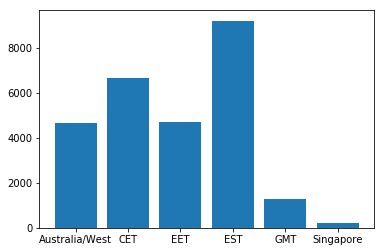

In [33]:
plt.bar(total_sales_revenue_by_time_zone.index, 
        height = total_sales_revenue_by_time_zone['Sales Revenue ($)'])

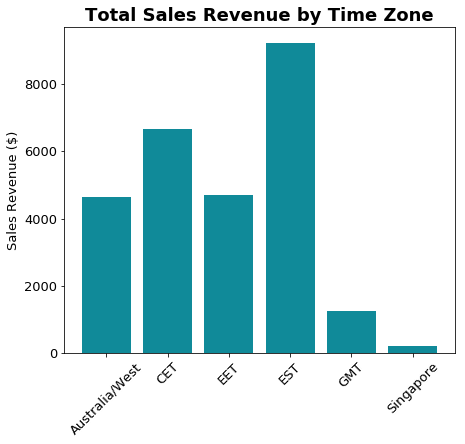

In [34]:
plt.figure(figsize = (7, 6)) 

plt.bar(total_sales_revenue_by_time_zone.index, 
        height = total_sales_revenue_by_time_zone['Sales Revenue ($)'], 
        color = "#108A99") 

plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Total Sales Revenue by Time Zone", fontsize = 18, fontweight = "bold") 
plt.ylabel("Sales Revenue ($)", fontsize = 13 ) 

plt.show() 

In [35]:
averages_by_time_zone = sales_data_viz.groupby('TimeZone').mean().sort_values('Sales Revenue ($)', ascending = False)
averages_by_time_zone

,OffsetUTC,Sales Revenue ($)
TimeZone,,
EET,2.500,586.687500
CET,1.625,415.710000
Australia/West,8.000,273.105882
EST,-5.000,230.385500
GMT,0.000,115.137273
Singapore,8.000,27.688750


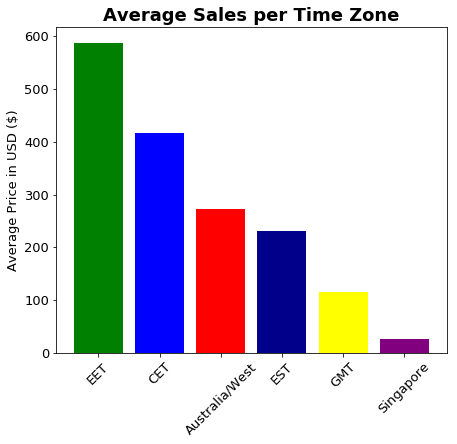

In [36]:
plt.figure(figsize = (7, 6))

plt.bar(averages_by_time_zone.index, 
        height = averages_by_time_zone['Sales Revenue ($)'], 
        color = ["green", "blue", "red", "darkblue", "yellow", "purple"]) 

plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Average Sales per Time Zone", fontsize = 18, fontweight = "bold") 
plt.ylabel("Average Price in USD ($)", fontsize = 13 ) 

plt.show() 